# LINEAR REGRESSION LSQUARE METHOD

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
xlabel = data['sqft_living']
ylabel = data['price']

x = np.array(xlabel)
y = np.array(ylabel)

mean_x = x.mean()
mean_y = y.mean()

num=0
denom=0

for i in range(len(xlabel)):
        num+= (x[i]-mean_x)*(y[i]-mean_y)
        denom+=(x[i]-mean_x)*(x[i]-mean_x)

m = num/denom
c = mean_y - m*mean_x

temp_x = [i for i in range(0,14010)]
temp_y = [m*i+c for i in temp_x]


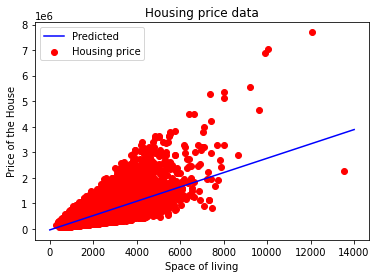

In [5]:
fig1 = plt.figure(1)
plt.scatter(x,y,label='Housing price',color='red')
plt.plot(temp_x,temp_y,label='Predicted',color='blue')
plt.xlabel('Space of living')
plt.ylabel('Price of the House')
plt.title('Housing price data')
plt.legend()


In [6]:
abs_error = 0
R2 = 0
num = 0
denom=0

for i in range(len(y)):
    abs_error+= abs(y[i] - (m*x[i]+c))
    num += (m*x[i]+c - mean_y)**2
    denom+= (y[i] - mean_y)**2
R2 = num/denom

print('Rsqaure is',R2)
print()
print('Absolute error is',abs_error)
    
print('The result predicted for the living area 1000 is :',m*1000+c)

Rsqaure is 0.49285321790379133

Absolute error is 3753924652.11956
The result predicted for the living area 1000 is : 237042.82480297383


In [6]:
##########################################################################################################################

# USING THE SCIKIT LEARN LIBRARY

0.4928532179037931
[280.6235679]
-43580.7430944728


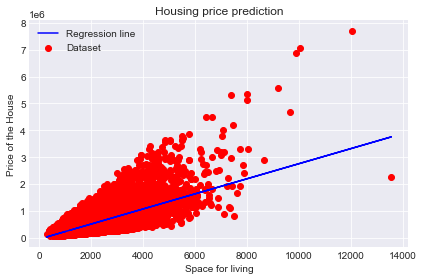

In [48]:
from sklearn.linear_model import LinearRegression

data = pd.read_csv('kc_house_data.csv')
x = np.array(data['sqft_living']).reshape(-1,1)
y = np.array(data['price'])

model = LinearRegression()
model.fit(x,y)
yp = model.predict(x)


plt.style.use('seaborn-darkgrid')
plt.scatter(x,y,label='Dataset',color='red')
plt.plot(x,yp,label='Regression line',color='blue')
plt.legend()
plt.title('Housing price prediction')
plt.xlabel('Space for living')
plt.ylabel('Price of the House')
plt.tight_layout()

print(model.score(x,y))
print(model.coef_)
print(model.intercept_)
